##### We will work on Binary Classification Problem

In [63]:
import numpy as np 
import pandas as pd

In [64]:
df = pd.read_csv("/home/rohit/Desktop/tutorials/Deep-Learning-Tutorials/backpropagation_projects/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [66]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)  # inplace=True means do not create new df, modify the same one
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
df['Exited'].value_counts()
# 7963 - hasn't left the bank
# 2037 - has left the bank
# So it a imbalanced classification problem

Exited
0    7963
1    2037
Name: count, dtype: int64

In [68]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [69]:
df['Gender'].value_counts()


Gender
Male      5457
Female    4543
Name: count, dtype: int64

##### Do One Hot Encoding for categorical columns --> basically to convert into numberical numbers

In [70]:

df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True, dtype=int)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


##### Now we need to scale our values like 'Salary' which is very large number --> If we try to train the Neural N/W w/o scaling, then weight values will converge easily. So it is recommended to do scaling



In [71]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [75]:
X_train_scaled

array([[-0.13647095, -0.27739636, -1.04493887, ..., -0.57638802,
        -0.57388614,  0.90727838],
       [ 1.49495937, -0.65654737, -1.04493887, ..., -0.57638802,
        -0.57388614,  0.90727838],
       [ 0.08036472, -0.94091063, -0.0041631 , ...,  1.73494238,
        -0.57388614,  0.90727838],
       ...,
       [ 2.06286234,  2.56623622, -0.35108836, ..., -0.57638802,
        -0.57388614,  0.90727838],
       [-0.61144434,  0.0069669 , -0.35108836, ..., -0.57638802,
        -0.57388614, -1.10219754],
       [ 0.33850243, -0.37218411,  1.38353792, ..., -0.57638802,
         1.74250594,  0.90727838]], shape=(8000, 11))

In [76]:
! pip install keras tensorflow

In [77]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()  # First build model then add layers
model.add(Dense(3, activation='sigmoid', input_dim=11))   # First dense layer with 3 nodes and input_dim=11
model.add(Dense(1, activation='sigmoid'))                 # O/P layer

/home/rohit/Desktop/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# model.compile(loss='binary_crossentropy', optimizer='Adam')  

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])  # optimizer is used for the Gradient Descent

 # Add metrics=['accuracy] to check accuracy in each epoch

In [98]:

# model.fit(X_train_scaled, y_train, epochs=10)   

# If we use history = model.fit(X_train_scaled, y_train, epochs=10) then all the training data will be stored in history
history = model.fit(X_train_scaled, y_train, epochs=100,validation_split=0.2)

Epoch 1/100


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8195 - loss: 0.4121 - val_accuracy: 0.8213 - val_loss: 0.4176
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8197 - loss: 0.4111 - val_accuracy: 0.8231 - val_loss: 0.4168
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8203 - loss: 0.4100 - val_accuracy: 0.8225 - val_loss: 0.4161
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8217 - loss: 0.4089 - val_accuracy: 0.8269 - val_loss: 0.4148
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8223 - loss: 0.4077 - val_accuracy: 0.8269 - val_loss: 0.4138
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8217 - loss: 0.4064 - val_accuracy: 0.8281 - val_loss: 0.4127
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8223 - loss: 0.4050 - val_accuracy: 0.8281 - val_loss: 0.4116
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8236 - loss: 0.4036 - val_accuracy: 0.8319

In [99]:
# To get the weights and biases of layers
model.layers[0].get_weights()

[array([[ 2.8384488e-02,  1.0600138e-01, -6.6991434e-03],
        [ 1.7236030e-01, -3.7605186e+00,  5.8802933e-01],
        [-1.4720506e-03, -2.2818467e-02,  1.7409928e-01],
        [ 7.0531106e-01, -9.0516411e-02,  1.2589165e+00],
        [ 9.7217339e-01, -8.0448538e-01,  3.9568062e+00],
        [-1.0778992e-02,  8.4524043e-02, -4.7875423e-02],
        [-8.6052871e-01, -6.6439420e-01,  4.6542260e-01],
        [-1.0644154e-01, -1.2778234e-01, -1.4477903e-01],
        [ 7.9189792e-02,  1.0118574e-01, -9.2487681e-01],
        [ 2.9221314e-01,  3.2615718e-01,  1.7094696e-01],
        [-4.0972424e-01, -1.8405928e-01,  5.8021978e-02]], dtype=float32),
 array([-0.9843177,  0.4210469,  2.0184262], dtype=float32)]

In [100]:
model.layers[1].get_weights()

[array([[ 3.7523358],
        [-2.7962484],
        [-3.1639638]], dtype=float32),
 array([0.60412437], dtype=float32)]

In [101]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.53590703],
       [0.12652984],
       [0.22154573],
       ...,
       [0.00729593],
       [0.08078413],
       [0.0086872 ]], shape=(2000, 1), dtype=float32)

In [102]:
# But the above O/P is not zero bcoz the above one is Sigmoid O/P. Now we have to decide some threshold then get 0/1.
# We can use ROC-AUC to get that but for now just take some random value

y_log = model.predict(X_test_scaled)

y_pred = np.where(y_log>0.5, 1, 0)  # prob>0.5 then 1 else 0
y_pred


 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], shape=(2000, 1))

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.852

In [104]:
# How can we improve results
# 1. Increase number of Epochs
# 2. Increase the number of hidden layers
# 3. Increat the number of nodes in hidden layer
# 4 . We can change the activation function maybe RELU
# 4. validation_split while fitting the model --> For validation

In [105]:
history.history

{'accuracy': [0.819531261920929,
  0.8196874856948853,
  0.8203125,
  0.8217187523841858,
  0.8223437666893005,
  0.8217187523841858,
  0.8223437666893005,
  0.8235937356948853,
  0.8239062428474426,
  0.8248437643051147,
  0.82421875,
  0.824999988079071,
  0.8256250023841858,
  0.8254687786102295,
  0.8267187476158142,
  0.8267187476158142,
  0.827343761920929,
  0.828125,
  0.8274999856948853,
  0.8279687762260437,
  0.8307812213897705,
  0.8307812213897705,
  0.8324999809265137,
  0.8329687714576721,
  0.8342187404632568,
  0.8362500071525574,
  0.8379687666893005,
  0.8384374976158142,
  0.8387500047683716,
  0.8392187356948853,
  0.8410937786102295,
  0.83984375,
  0.8407812714576721,
  0.8412500023841858,
  0.8414062261581421,
  0.8418750166893005,
  0.8426562547683716,
  0.8420312404632568,
  0.8442187309265137,
  0.8439062237739563,
  0.8443750143051147,
  0.8440625071525574,
  0.844531238079071,
  0.8453124761581421,
  0.8453124761581421,
  0.8446875214576721,
  0.84515625238

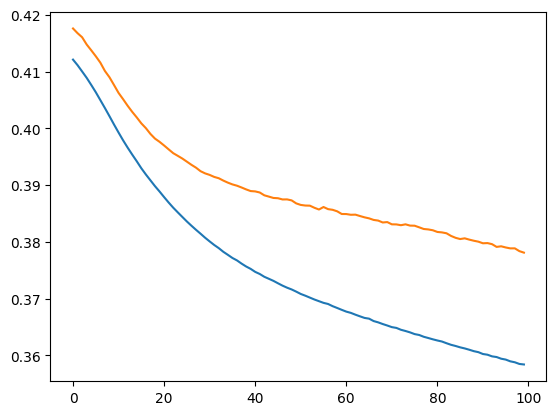

In [106]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])   # validation loss

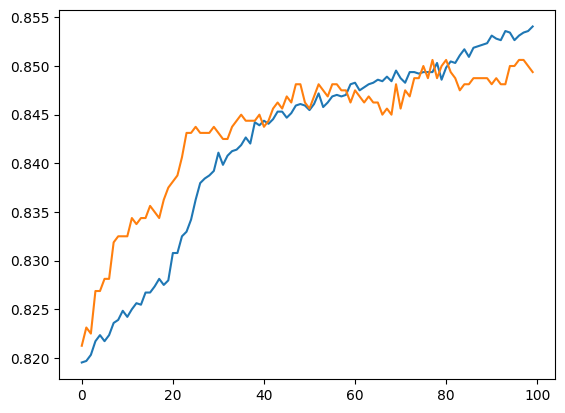

In [107]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])